**Import library**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Reading & display an exceptional image**

In [2]:
#when image file stored at the same location with original python file
pathName ='pic_test.jpg' #filenamef

In [3]:
img_color= cv2.imread(pathName,cv2.IMREAD_COLOR)
#or using cv2.imread(pathName,1)

In [4]:
img_grayscale = cv2.imread(pathName, cv2.IMREAD_GRAYSCALE)
#cv2.imread(pathN)

In [5]:
cv2.imshow('color image', img_color)
# Waits for a keystroke
cv2.waitKey(0)  


-1

In [6]:
cv2.imshow('grayscale image', img_grayscale)
# Waits for a keystroke
cv2.waitKey(0)  

-1

**Histogram Calculation**

In [7]:
# calculate frequency of pixels in range 0-255
histg = cv2.calcHist([img_grayscale],[0],None,[256],[0,256])
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

#channels = 0 for grayscale

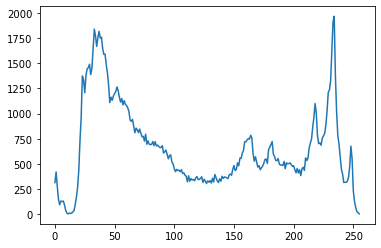

In [8]:
#importing library for plotting
from matplotlib import pyplot as plt

# show the plotting graph of an image
plt.plot(histg)
plt.show()

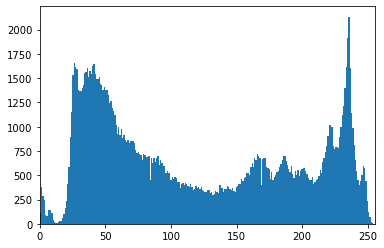

In [9]:
# calculate mean value from RGB channels and flatten to 1D array
vals = img_color.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

#with img_grayscale: axis =1

**Reducing the intensity resolution of grey-level image**

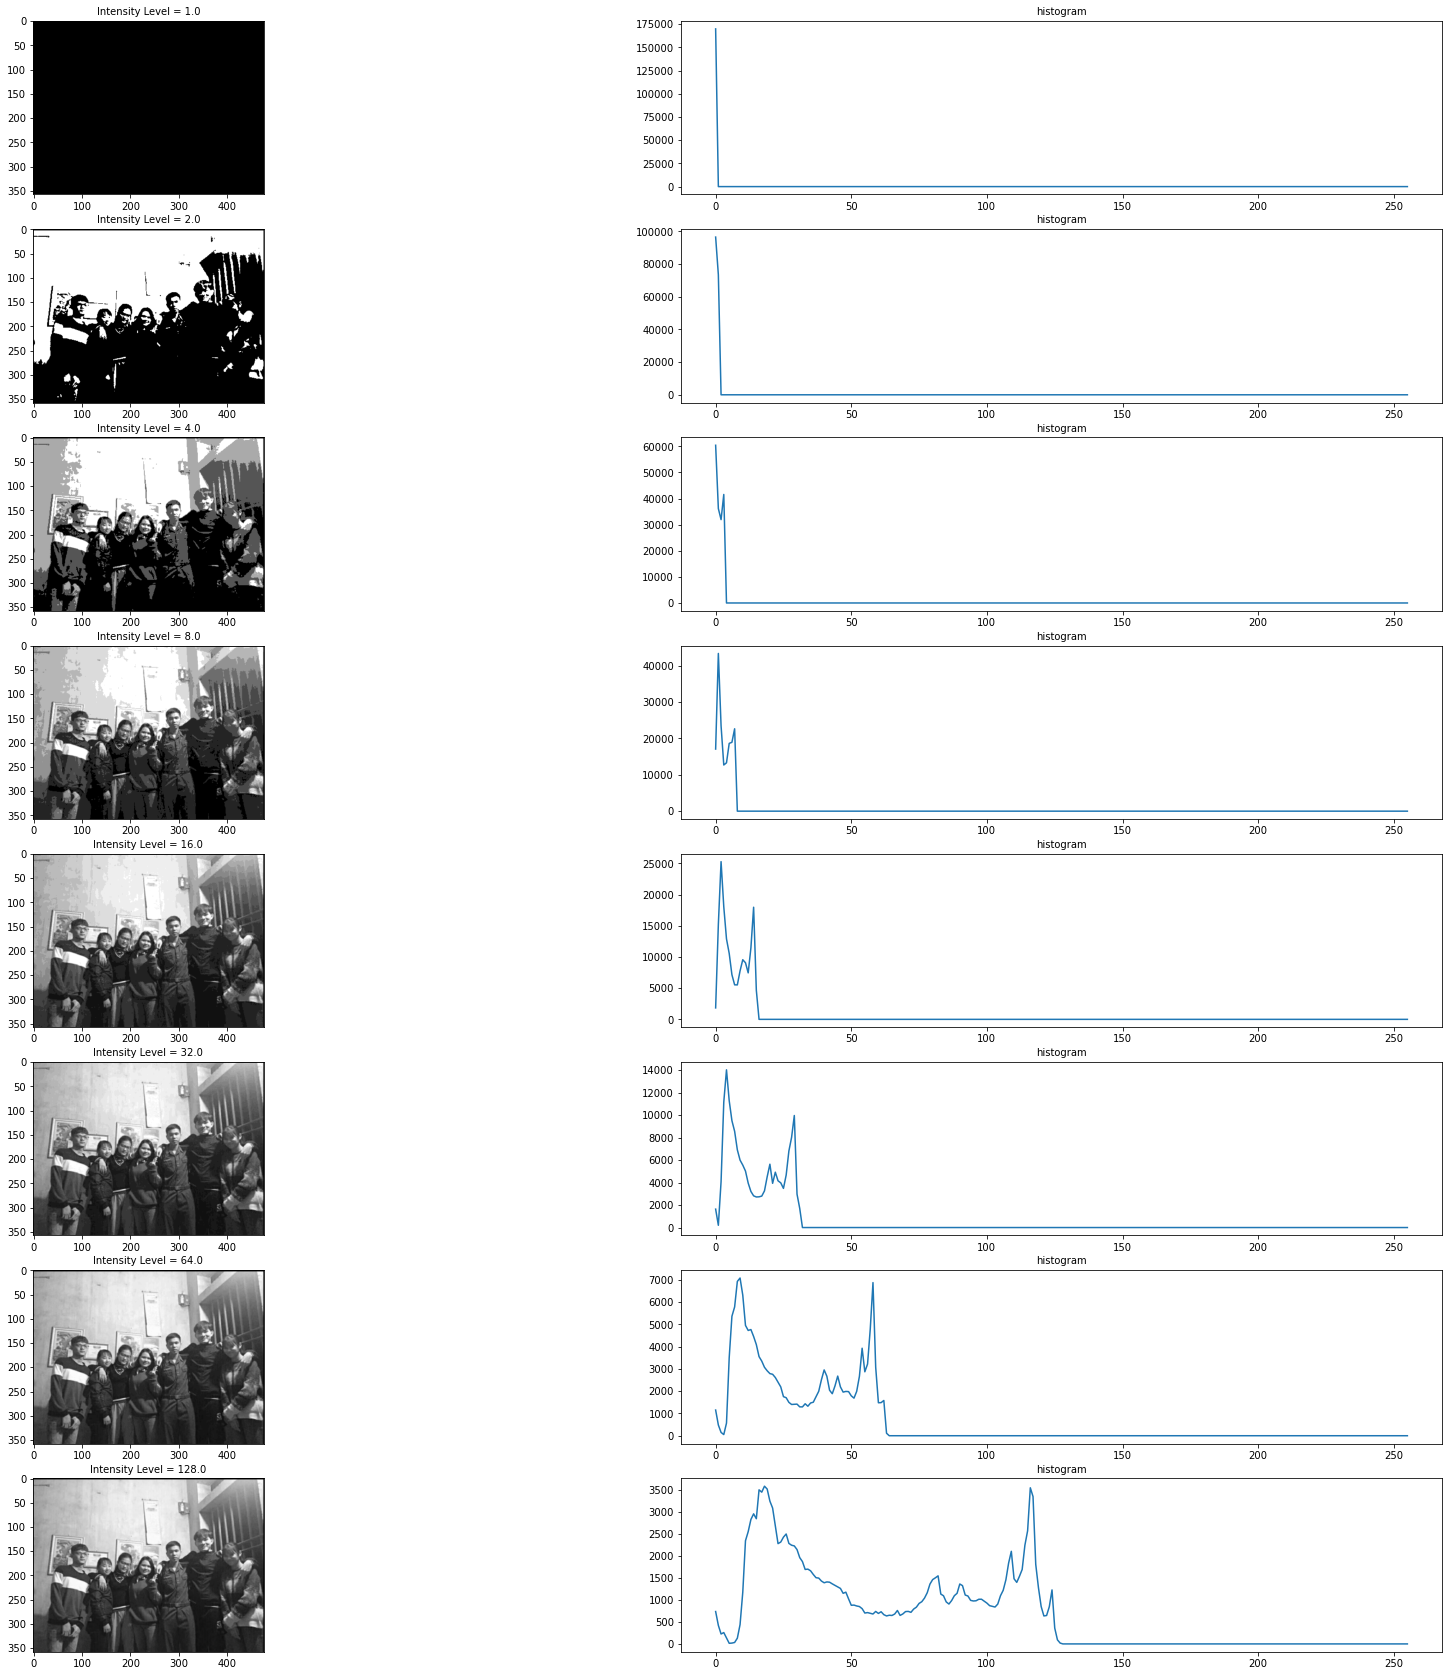

In [10]:
import numpy as np
import matplotlib.pyplot as plt


img_grayscale = cv2.imread(pathName, cv2.IMREAD_GRAYSCALE)

k = 8
fig, axs = plt.subplots(k, 2, figsize=(30,30))

for i in range(k):
    intensity_level = 2**k
    current_compression = 256 / intensity_level
    img_reduced = np.uint8(np.floor(np.double(img_grayscale) / intensity_level))
    axs[i, 0].imshow(img_reduced, cmap='gray', vmin=0, vmax=current_compression-1)
    axs[i, 0].set_title(f'Intensity Level = {current_compression}', fontsize=10)
    histg = cv2.calcHist([img_reduced],[0],None,[256],[0,256])
    axs[i, 1].plot(histg)
    axs[i, 1].set_title('histogram', fontsize=10)
    k -= 1
plt.show()

**Intensity profile**

In [11]:
kt=img_color.shape
print(kt)
#độ sâu của ảnh màu là 3 và ảnh đen trắng là 1

(358, 475, 3)


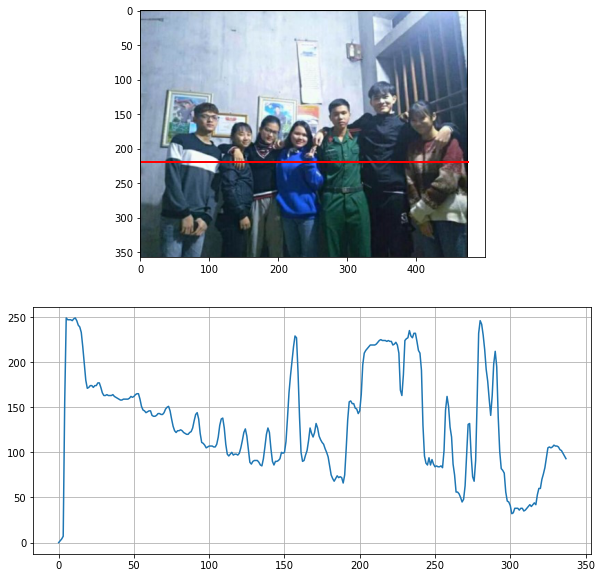

In [12]:
# for R B G color

from matplotlib import pyplot as plt
from skimage.measure import profile_line
from skimage.io import imread

start = (0, 475) #Start of the profile line
end = (220, 220) #End of the profile line

image = imread(r'F:\dowloadChrome\image\pic_test.jpg') #Read the images
#image = imread(r'F:\dowloadChrome\image\pic_test.jpg',as_gray=True) #Read the images
profile = profile_line(img_grayscale, start, end, linewidth=1,mode='constant')  #img_grayscale
fig, ax = plt.subplots(2, 1, figsize=(10, 10)) #Create the figures
ax[0].imshow(image) #Show the film at the top
ax[0].plot(start, end, 'r-', lw=2) #Plot a red line across the film
ax[1].plot(profile)
ax[1].grid()